# 수업시간 실습 부분

In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [4]:
data = []

for line in open("iris.data", "r"):
  raw = line.split(',')
  x = [float(r) for r in raw[:4]]
  y = raw[4].strip()
  data.append((x, y))


In [5]:
data

[([5.1, 3.5, 1.4, 0.2], 'Iris-setosa'),
 ([4.9, 3.0, 1.4, 0.2], 'Iris-setosa'),
 ([4.7, 3.2, 1.3, 0.2], 'Iris-setosa'),
 ([4.6, 3.1, 1.5, 0.2], 'Iris-setosa'),
 ([5.0, 3.6, 1.4, 0.2], 'Iris-setosa'),
 ([5.4, 3.9, 1.7, 0.4], 'Iris-setosa'),
 ([4.6, 3.4, 1.4, 0.3], 'Iris-setosa'),
 ([5.0, 3.4, 1.5, 0.2], 'Iris-setosa'),
 ([4.4, 2.9, 1.4, 0.2], 'Iris-setosa'),
 ([4.9, 3.1, 1.5, 0.1], 'Iris-setosa'),
 ([5.4, 3.7, 1.5, 0.2], 'Iris-setosa'),
 ([4.8, 3.4, 1.6, 0.2], 'Iris-setosa'),
 ([4.8, 3.0, 1.4, 0.1], 'Iris-setosa'),
 ([4.3, 3.0, 1.1, 0.1], 'Iris-setosa'),
 ([5.8, 4.0, 1.2, 0.2], 'Iris-setosa'),
 ([5.7, 4.4, 1.5, 0.4], 'Iris-setosa'),
 ([5.4, 3.9, 1.3, 0.4], 'Iris-setosa'),
 ([5.1, 3.5, 1.4, 0.3], 'Iris-setosa'),
 ([5.7, 3.8, 1.7, 0.3], 'Iris-setosa'),
 ([5.1, 3.8, 1.5, 0.3], 'Iris-setosa'),
 ([5.4, 3.4, 1.7, 0.2], 'Iris-setosa'),
 ([5.1, 3.7, 1.5, 0.4], 'Iris-setosa'),
 ([4.6, 3.6, 1.0, 0.2], 'Iris-setosa'),
 ([5.1, 3.3, 1.7, 0.5], 'Iris-setosa'),
 ([4.8, 3.4, 1.9, 0.2], 'Iris-setosa'),


In [6]:
# 두 방식 모두 가능

def distance(a, b):

  s = 0
  for x, y in zip(a, b):
    s += (x-y) ** 2

  return s ** 0.5

def distance2(a, b):
  return sum((x-y)**2 for x, y in zip(a, b)) ** 0.5

In [7]:
a = distance(data[0][0], data[1][0])
a

0.5385164807134502

In [8]:
from collections import Counter

def knn_classify(k, query, train):
  # query = [5.9, 3.0, 5.1, 1.8]
  # train = ([6.5, 3.0, 5.2, 2.0], 'Iris-virginica')

  res = sorted([(distance(query, v), l)for v, l in train])[:k]
  cnts = Counter(r[1] for r in res)
  mc = cnts.most_common(2)

  # 동률을 처리하기 위해 
  while len(cnts) >=2 and mc[0][1] == mc[1][1]:
    res = res[:-1]
    cnts = Counter(r[1] for r in res)
    mc = cnts.most_common(2)

  return cnts.most_common(1)[0][0]


knn_classify(10, [5.5, 3.1, 5.0, 1.7], data)

'Iris-virginica'

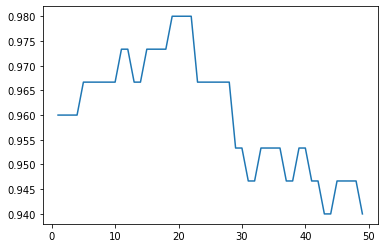

In [9]:
import matplotlib.pyplot as plt

# 굉장히 비효율적이지만 한 번 해보자 !


# 정확도 넣기
Y = []
# k 값 넣기
X = []

for k in range(1, 50):
  n_correct = 0
  n_incorrect = 0

  for i, q in enumerate(data):
    new_data = []
    for j, d in enumerate(data):
      if i == j: continue
      new_data.append(d)
    
    ans = knn_classify(k, q[0], new_data)
    true_ans = q[1]
    if (ans == true_ans): n_correct += 1
    else: n_incorrect += 1

  X.append(k)
  Y.append(n_correct / (n_correct + n_incorrect))


plt.plot(X, Y)
plt.show()


# PDF 보고 학습한 부분

In [10]:
data = []
with open('iris.data', 'r') as f:
   for line in f:
       if line.strip():
           item = line.strip().split(",")
           data.append( ([float(val) for val in item[:-1]], item[-1]) )

species = {s: i for i, s in enumerate(set(d[1] for d in data))}

data = [(d[0], species[d[1]]) for d in data]

In [11]:
data

[([5.1, 3.5, 1.4, 0.2], 1),
 ([4.9, 3.0, 1.4, 0.2], 1),
 ([4.7, 3.2, 1.3, 0.2], 1),
 ([4.6, 3.1, 1.5, 0.2], 1),
 ([5.0, 3.6, 1.4, 0.2], 1),
 ([5.4, 3.9, 1.7, 0.4], 1),
 ([4.6, 3.4, 1.4, 0.3], 1),
 ([5.0, 3.4, 1.5, 0.2], 1),
 ([4.4, 2.9, 1.4, 0.2], 1),
 ([4.9, 3.1, 1.5, 0.1], 1),
 ([5.4, 3.7, 1.5, 0.2], 1),
 ([4.8, 3.4, 1.6, 0.2], 1),
 ([4.8, 3.0, 1.4, 0.1], 1),
 ([4.3, 3.0, 1.1, 0.1], 1),
 ([5.8, 4.0, 1.2, 0.2], 1),
 ([5.7, 4.4, 1.5, 0.4], 1),
 ([5.4, 3.9, 1.3, 0.4], 1),
 ([5.1, 3.5, 1.4, 0.3], 1),
 ([5.7, 3.8, 1.7, 0.3], 1),
 ([5.1, 3.8, 1.5, 0.3], 1),
 ([5.4, 3.4, 1.7, 0.2], 1),
 ([5.1, 3.7, 1.5, 0.4], 1),
 ([4.6, 3.6, 1.0, 0.2], 1),
 ([5.1, 3.3, 1.7, 0.5], 1),
 ([4.8, 3.4, 1.9, 0.2], 1),
 ([5.0, 3.0, 1.6, 0.2], 1),
 ([5.0, 3.4, 1.6, 0.4], 1),
 ([5.2, 3.5, 1.5, 0.2], 1),
 ([5.2, 3.4, 1.4, 0.2], 1),
 ([4.7, 3.2, 1.6, 0.2], 1),
 ([4.8, 3.1, 1.6, 0.2], 1),
 ([5.4, 3.4, 1.5, 0.4], 1),
 ([5.2, 4.1, 1.5, 0.1], 1),
 ([5.5, 4.2, 1.4, 0.2], 1),
 ([4.9, 3.1, 1.5, 0.1], 1),
 ([5.0, 3.2, 1.2, 0.

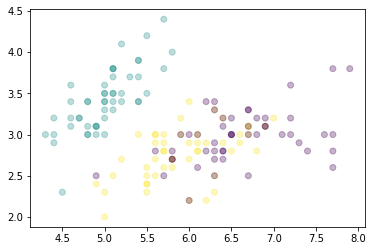

In [12]:
plt.scatter([d[0][0] for d in data], [d[0][1] for d in data], c = [d[1] for d in data], alpha = 0.3)
plt.show()

In [13]:
# train data와 test data로 분리

random.shuffle(data)

train = data[:-30]
test = data[-30:]

In [14]:
print(train)
print(test)

[([4.8, 3.1, 1.6, 0.2], 1), ([6.4, 2.7, 5.3, 1.9], 0), ([5.4, 3.4, 1.5, 0.4], 1), ([5.1, 3.5, 1.4, 0.2], 1), ([6.2, 2.9, 4.3, 1.3], 2), ([4.3, 3.0, 1.1, 0.1], 1), ([6.0, 3.0, 4.8, 1.8], 0), ([6.4, 2.9, 4.3, 1.3], 2), ([5.8, 2.7, 3.9, 1.2], 2), ([4.9, 3.1, 1.5, 0.1], 1), ([4.4, 2.9, 1.4, 0.2], 1), ([4.6, 3.6, 1.0, 0.2], 1), ([6.0, 2.7, 5.1, 1.6], 2), ([4.8, 3.0, 1.4, 0.3], 1), ([7.9, 3.8, 6.4, 2.0], 0), ([6.7, 3.1, 5.6, 2.4], 0), ([6.7, 3.3, 5.7, 2.1], 0), ([6.5, 3.0, 5.5, 1.8], 0), ([6.7, 3.0, 5.2, 2.3], 0), ([5.5, 2.4, 3.8, 1.1], 2), ([6.4, 3.2, 4.5, 1.5], 2), ([5.0, 3.3, 1.4, 0.2], 1), ([6.3, 2.5, 4.9, 1.5], 2), ([5.7, 2.6, 3.5, 1.0], 2), ([7.7, 2.8, 6.7, 2.0], 0), ([5.9, 3.0, 4.2, 1.5], 2), ([5.2, 2.7, 3.9, 1.4], 2), ([5.7, 2.8, 4.1, 1.3], 2), ([6.8, 2.8, 4.8, 1.4], 2), ([6.3, 2.5, 5.0, 1.9], 0), ([4.8, 3.0, 1.4, 0.1], 1), ([7.4, 2.8, 6.1, 1.9], 0), ([5.2, 4.1, 1.5, 0.1], 1), ([6.5, 2.8, 4.6, 1.5], 2), ([5.4, 3.9, 1.7, 0.4], 1), ([5.7, 2.5, 5.0, 2.0], 0), ([5.8, 2.7, 4.1, 1.0], 2), 

In [16]:
def distance(a, b): 

  s = 0
  for i in range(len(a[0])):
      s += (a[0][i] - b[0][i]) ** 2

  return s ** 0.5


def knn_classify(k, query, train):
  knns = sorted((distance(point, query), point) for point in train)[:k]

  scores = {} # 거리에따라 가중치를 주어 점수 계산 

  for dist, point in knns:
    scores[point[1]] = scores.get(point[1], 0) + 1/(1+dist)

  resp, score = max(scores.items(), key=lambda x: x[1])

  return resp

In [17]:
k= 3
correct = sum(1 for t in test if knn_classify(k, t, train) == t[1]) 

accuracy = correct/len(test)

print("accuracy:", accuracy)

accuracy: 0.9333333333333333


100%|██████████| 100/100 [00:15<00:00,  6.62it/s]


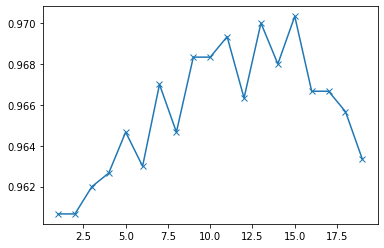

In [18]:
# 최적의 k 찾기

num_trials = 100
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
corrects = [0] * 20

for i in tqdm(range(num_trials)):

    random.shuffle(data)
    train = data[:train_size]
    test = data[train_size:]

    for k in range(1,20):
        corrects[k] += sum(1 for t in test if knn_classify(k, t, train) == t[1])

for k in range(1, 20):
    corrects[k] /= num_trials * test_size

plt.plot(range(1,20), corrects[1:], '-x')
plt.show()